Recurrent Neural Network
- Recurrent Neural Network remembers the previous input and puts the weight into it, and whenever it recalls it, it would remember such word to output


Long Short Term Memory - LSTM
- Advanced version of RNN


CNN - 사진용
RNN activation function is tanh (hyperbolic tangent)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv("./datas/icecream/ice_cream_sales_data.csv", parse_dates=['Month'])

features = ['Temperature', 'Holidays', 'Promotion']
target = 'Sales'

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_Y.fit_transform(df[[target]])

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)

split = int(0.8 *  len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

model = Sequential([
    LSTM(64, activation = 'tanh', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

history=model.fit(X_train, y_train, epochs=100, batch_size =8, validation_split=0.1, verbose=1)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.2266 - val_loss: 0.0272
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0933 - val_loss: 0.0500
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0930 - val_loss: 0.0661
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1044 - val_loss: 0.0241
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0745 - val_loss: 0.0220
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0900 - val_loss: 0.0213
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0795 - val_loss: 0.0209
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0627 - val_loss: 0.0232
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0666 - val_loss: 0.0267
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0635 - val_loss: 0.0248
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0573 - val_loss: 0.0213
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0698 - val_lo

In [26]:
print(np.array(X_scaled[0:12]))

[[0.51327434 0.25       0.        ]
 [0.7079646  0.         0.        ]
 [0.90265487 1.         0.        ]
 [1.         0.5        0.        ]
 [0.86283186 0.75       0.        ]
 [0.70353982 0.5        0.        ]
 [0.5619469  0.5        0.        ]
 [0.30530973 0.         0.        ]
 [0.08849558 0.5        0.        ]
 [0.07079646 1.         0.        ]
 [0.08849558 0.5        0.        ]
 [0.24778761 0.         1.        ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


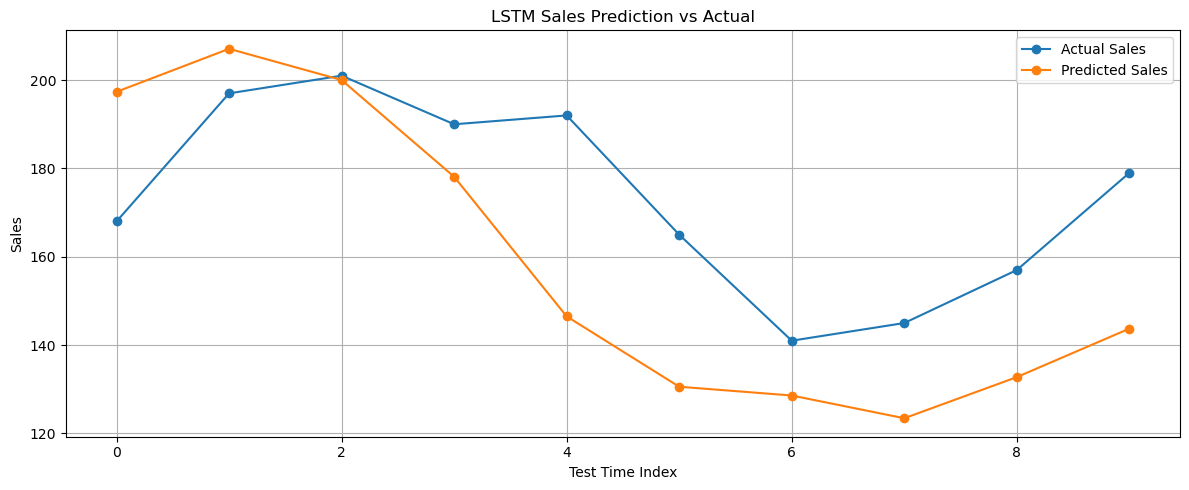

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
다음 달 예상 판매량: 136.76


In [18]:
y_pred = model.predict(X_test)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_test_inv = scaler_Y.inverse_transform(y_test)

plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual Sales', marker='o')
plt.plot(range(len(y_pred_inv)), y_pred_inv, label='Predicted Sales', marker='o')
plt.title("LSTM Sales Prediction vs Actual")
plt.xlabel("Test Time Index")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

last_seq = X_scaled[-12:].reshape(1, 12, len(features))
next_pred_scaled = model.predict(last_seq)
next_pred = scaler_Y.inverse_transform(next_pred_scaled)
print(f"다음 달 예상 판매량: {next_pred[0][0]:.2f}")